**Task 1: Machine Learning Pipeline**

In this coursework you will apply what you have learnt in this module to solve real- world problems, both with classical machine learning and popular deep learning methods. The coursework has two tasks, the first task is about designing a pipeline (i.e., a standard procedure on data preliminary analysis, selection of ML methods, training and test data splitting, metrics selection and evaluation) to use ML to solve a predefined task

Design a pipeline, an evaluation strategy, and a set of experiments to determine the best parameters and machine learning algorithm, based on the results of empirical evaluations derived from a dataset (for achieving this, you could compare different algorithms if needed). Data used for this task:
A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyse the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

Multiple attributes have been provided about the customers information along with demographics.

Features:
• Client number. Unique identifier for the customer holding the account.
• Demographic variable - Customer's Age in Years.
• Demographic variable – Gender M=Male, F=Female.
• Demographic variable - Number of dependents.
• Demographic variable - Educational Qualification of the account holder (example: high school, college graduate)
• Demographic variable – Marital_Status: Married, Single, Divorced, Unknown.
• Demographic variable - Annual Income Category of the account holder (< $40K,
$40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown).

• Product Variable - Type of Card (Blue, Silver, Gold, Platinum).
• Month on book - Period of relationship with bank.
• Total relationship count: Total no. of products held by the customer.
• Months inactive: No. of months inactive in the last 12 months
• No. of Contacts in the last 12 months.
• Credit Limit on the Credit Card.
• Total Revolving Balance on the Credit Card.
• Open to Buy Credit Line (Average of last 12 months).
• Change in Transaction Amount (Q4 over Q1).
• Total Transaction Amount (Last 12 months).
• Total Transaction Count (Last 12 months).
• Change in Transaction Count (Q4 over Q1)
• Average Card Utilization Ratio.
• Attrition Flag. Internal event (customer activity) variable - if the account is closed then 1 else 0.

    Inspiration
Predict whether a customer is likely to cancel his account.

# Importing and Exploring the Data

### First all libraries are imported 

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import cross_val_score

###  Import the data and look at the head and tail to get a feel for the data 

In [129]:
data = pd.read_csv('/Users/michaelacoetsee/Desktop/AI&ML_CW /AI&ML CW/BankChurners.csv')
# Called the data into a pandas dataframe

#data.head(20)
data.tail(20)

# I called the first 20 rows of data and the last 20 to get an overview of the data
# Each row represents a customer (either existing or attrited) and each column represents an attribute

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10107,713924283,Attrited Customer,61,M,0,Graduate,Single,$60K - $80K,Blue,54,2,1,4,11859.0,1644,10215.0,0.866,8930,79,0.837,0.139
10108,714471183,Attrited Customer,47,M,4,Graduate,Divorced,$80K - $120K,Blue,39,4,3,4,17504.0,476,17028.0,0.892,10468,66,0.737,0.027
10109,780613758,Existing Customer,47,M,5,High School,Single,Less than $40K,Blue,35,4,3,5,4165.0,0,4165.0,0.813,17093,111,0.820,0.000
10110,718225683,Existing Customer,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,2,2,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032
10111,710734308,Existing Customer,49,M,1,Graduate,Single,$60K - $80K,Blue,40,6,3,3,6481.0,1569,4912.0,0.692,15937,119,0.803,0.242
10112,708564858,Attrited Customer,33,M,2,College,Married,$120K +,Gold,20,2,1,4,34516.0,0,34516.0,1.004,9338,73,0.622,0.000
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,36,2,3,2,13303.0,2517,10786.0,0.929,10219,85,0.809,0.189
10114,720841533,Existing Customer,29,M,0,Graduate,Married,Less than $40K,Blue,15,3,1,5,4700.0,0,4700.0,0.617,14723,96,0.655,0.000
10115,712210458,Existing Customer,38,M,1,Uneducated,Single,$40K - $60K,Blue,36,2,3,2,5639.0,1558,4081.0,0.614,16628,109,0.946,0.276
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,1,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170


### Next we get an overview of the data using useful pandas functions

In [3]:
data.info()
# This returned the number of attributes (21) with their index number and names.
# It also showed the data types of each attribute and the non-null counts,
# which we can see that there are no null values in any of the attributes
# as there are 10127 entries or rows and the non-null vales are all 10127

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
# To double check that there aren't any null values the below code was run
# This counted the number of null values in each column which we can see was 0 for all attributes

null_count = data.isnull().sum()
print(null_count)

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [46]:
data[["Attrition_Flag"]].value_counts() 

# shows the categories of attrition flag and the number of customers in each category.

Attrition_Flag   
Existing Customer    8500
Attrited Customer    1627
dtype: int64

In [6]:
# shows the levels of each catergorical attribute
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}

# Can see that there are unknowns in education level, marital status and income category

#“Code adapted from: [https://www.youtube.com/watch?v=pyeUcmmLeiM, Gabriel Atkin]”

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [7]:
data.describe()

# summarised the numerical attributes in the df. 
# the mean, min and max are shown. Std is standard deviation which shows how dispersed the data is from the mean.
# this summary also shows the 25%, 50% and 75% percentile/quartile ranges. 
# e.g. 75% of customers are 52 years old or younger

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
data.describe(include=['object'])

# Using the 'object' command also briefly summarised the categorical features. 
# top = mode, unique = levels in each category and freq = frequency of the mode.

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


### Now to get an overview of the numerical attributes a histogram matrix has been created below

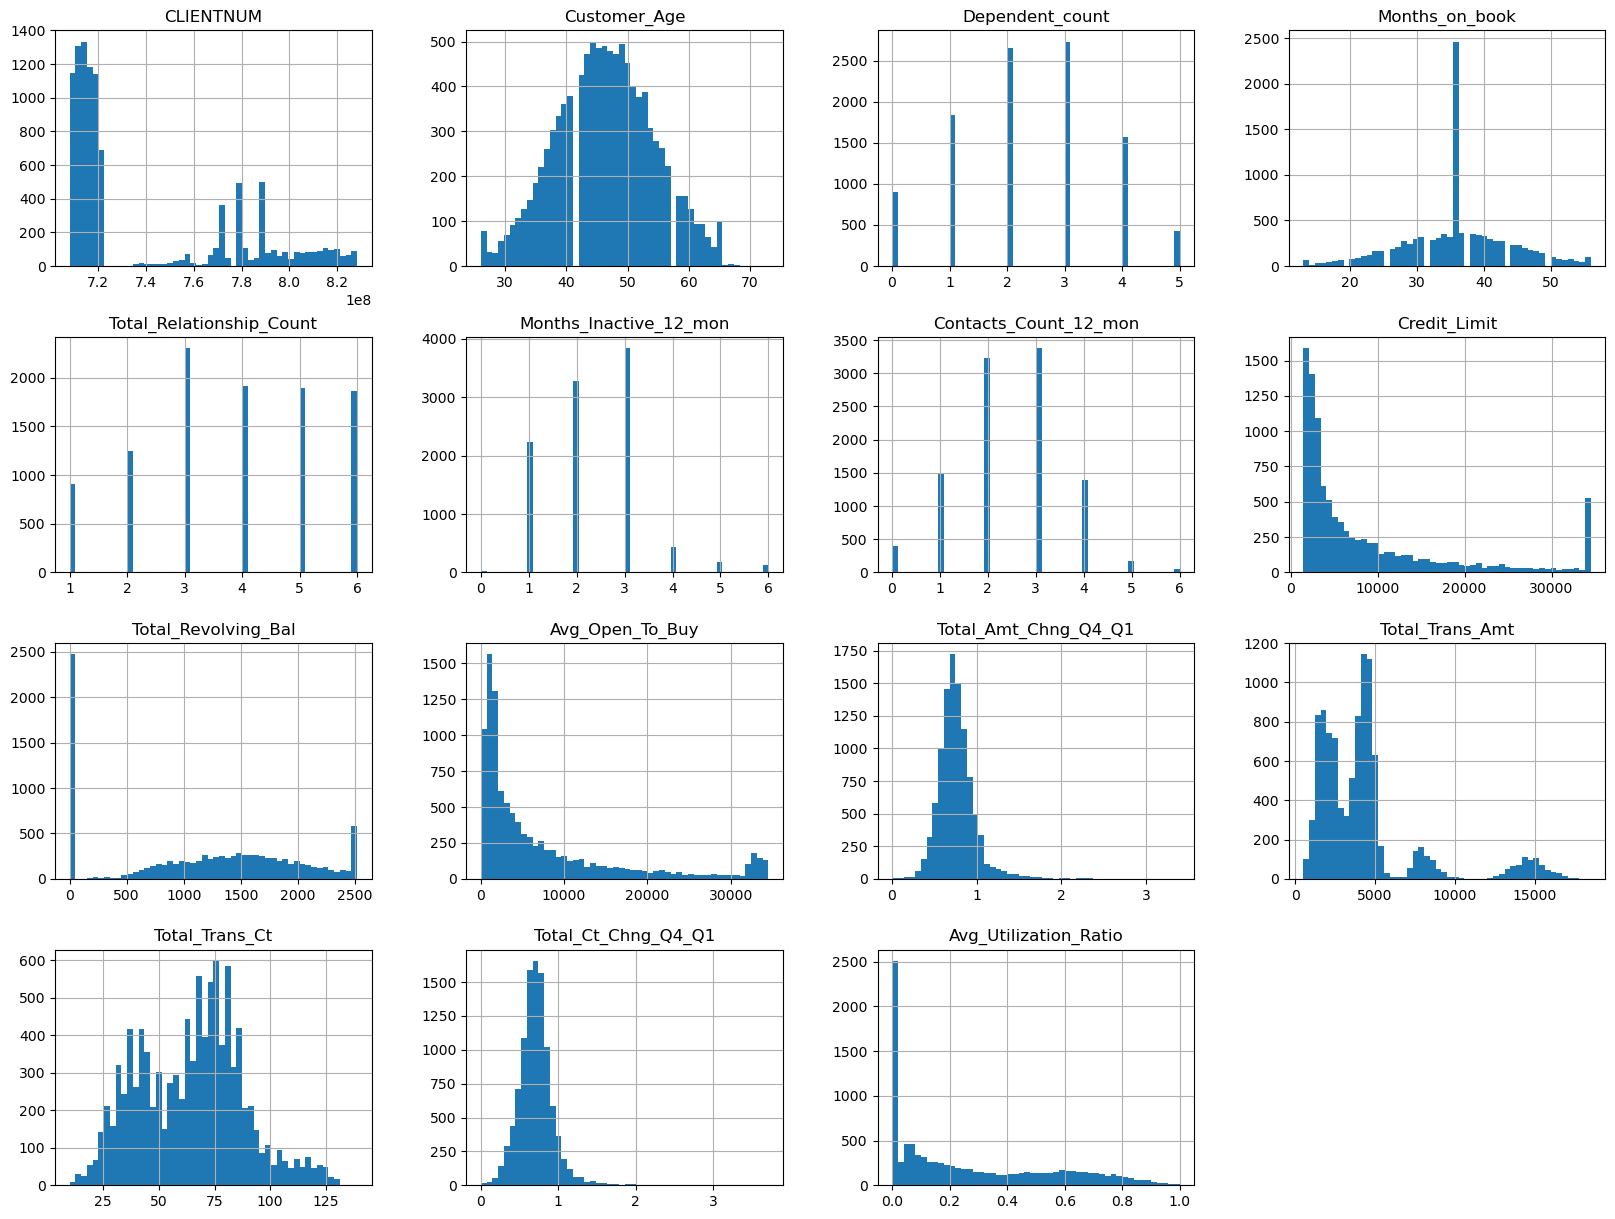

In [130]:
# Produced histograms for numerical attributes, this helped to visualise distribution.
data.hist(bins = 50, figsize = (20,15))
plt.show()

#“Code adapted from: [Hands on Machine Learning with Scikit-Learn, Keras & Tensorflow, Aurelien Geron]”

We can see here that there is a large spike in Months_on_book at around 35 months meaning that a large amount of customers seem to be leaving at the same point in time, suggesting that something takes place during this time causing them to leave.

Age seems to be capped at 26 which would need to be confirmed with the client as this could cause problems further down the line as ML algorithms may learn that that is the minimum age and would be unable to classify or predict data for anyone under the age of 26 even though most banks allow anyone over 18 to apply for a credit card.

Avg card utilisation ratio shows that there is a large number of customers that never use their credit card.

At least 7 of the above graphs are right skewed and many of them have different ranges of measurement so the data may need to be transformed before algorithms can be run on the data. 

In [10]:
data.columns
# Gives the exact names of each column head

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### Below I created a scatter matrix of scatterplot diagrams of the numerical attributes that may be most likely to be correlated and to avoid running 9²=81 plots.

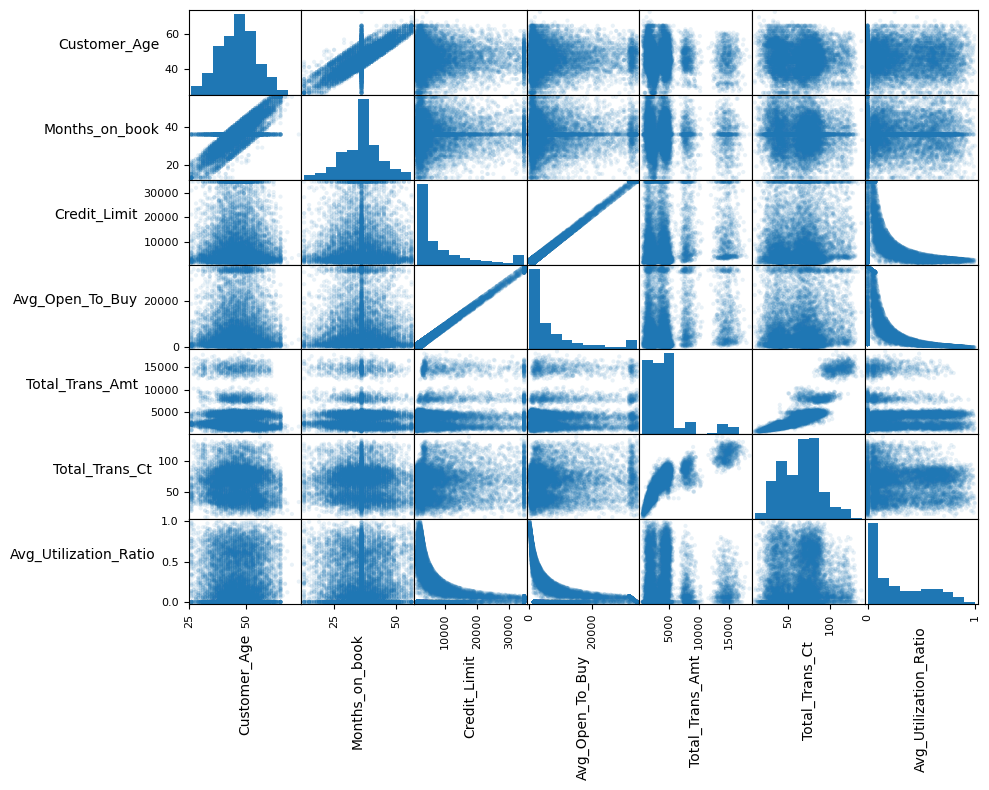

In [11]:
from pandas.plotting import scatter_matrix

attributes = ['Customer_Age', 
              'Months_on_book', 
              'Credit_Limit',
              'Avg_Open_To_Buy', 
              'Total_Trans_Amt',
              'Total_Trans_Ct', 
              'Avg_Utilization_Ratio']

#scatter_matrix(data[attributes], figsize=(12, 8), diagonal='hist')
axes = pd.plotting.scatter_matrix(data[attributes], alpha=0.1, figsize = (10,8))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

#“Code adapted from: [Stef (2019) Stackoverflow: 
# Pandas scatter_matrix: Labels vertical (x) and horizontal (y) without being cut-off.]
#“Code adapted from: [Hands on Machine Learning with Scikit-Learn, Keras & Tensorflow, Aurelien Geron]”

We can see that there are a few graphs which are showing some kind of relationship, lets look at these more closely and change the density with alpha

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

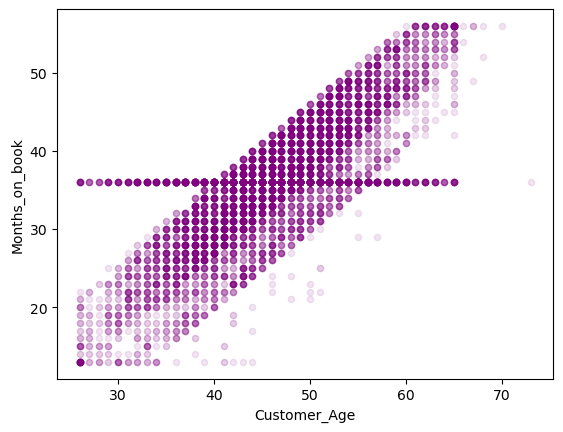

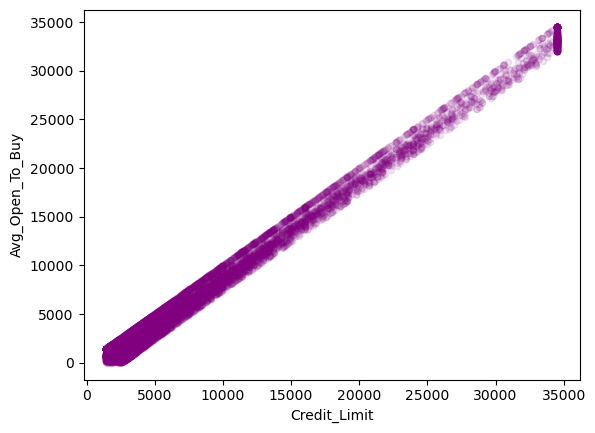

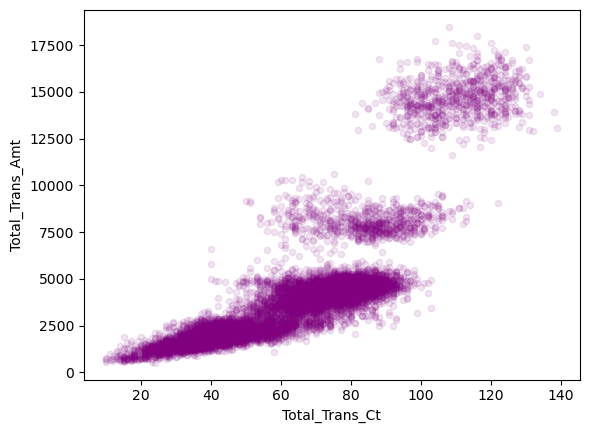

In [11]:
# Customer_Age and Months_on_book were plotted in a scattergraph

data.plot(kind = "scatter", x = "Customer_Age", 
          y = "Months_on_book", alpha = 0.1, color = "purple")

# Credit_Limit and Avg_Open_To_Buy were aslo plotted in a scattergraph

data.plot(kind = "scatter", x = "Credit_Limit", 
          y = "Avg_Open_To_Buy", alpha = 0.1, color = "purple")

# Total_Trans_Amt and Total_Trans_Ct

data.plot(kind = "scatter", x = "Total_Trans_Ct", 
          y = "Total_Trans_Amt", alpha = 0.1, color = "purple")

#“Code adapted from: [Hands on Machine Learning with Scikit-Learn, Keras & Tensorflow, Aurelien Geron]”

We can see in the top graph that there is a positive relationship between Months_on_book and Customer_Age which makes sense as older people have the chance to have their account open for longer, although we can see that this isn't always the case. Some people close their account early, especially between the ages of 40 and 50 when perhaps people have better credit ratings and can open an account with better benefits. There is also a line of data poitns at around 35 months as we saw in the histogram which further supports that something happens around this time causing people to close their accounts.

As shown in the histograms previously we can also see that around 35 months something happens, (perhaps an intro bonus ends around this time) which means that people from a range of ages close their account.

Credit_Limit and Avg_Open_To_Buy were perfectly positively correlated meaning that these 2 attributes are probably related. 

Total_Trans_Ct and Total_Trans_Amt seems to have a positive relationship too, although the data seems to cluster at points.

After applying an alpha of 0.1 to each scatterplot highlighted the high density areas became more visible.

We can now see that there is potentially a cap on the credit limit data of 35,000 as there is a high density line at 35,000, again that would need to be checked with the client.

We can also see a high density area showing that in 12 months, transaction counts mostly range from 10 (min value from table above) to about 90 and most of these customers are spending between 510 (min value from table above) to around 5000. There are 2 other clusters, one showing transactions counts of between 60 and 100 and are spending 7,500 to 10,000 and the other showing much higher transactions (between 125,000 to 175,000) and much higher transaction counts (90 to 130).

# Data Preperation for Machine Learning Algorithms

In [12]:
#mode_EL = data.Education_Level.value_counts().head(1).index[0] #most frequent
#mode_IC = data.Income_Category.value_counts().head(1).index[0] #most frequent

#print(mode_EL)
#print(mode_IC)

# mode was taken as these are categorial attributes

Graduate
Less than $40K


In [65]:
# created an ordinal encoding function
def ordinal_enc(bank_data, column, ordering):
    bank_data = bank_data.copy()
    bank_data[column] = bank_data[column].apply(lambda x : ordering.index(x))
    return bank_data

# created a binary encoding function
def binary_enc(bank_df, column, positive_val):
    bank_df = bank_df.copy()
    bank_df[column] = bank_df[column].apply(lambda x : 1 if x  == positive_val else 0)
    return bank_df

#“Code adapted from: [https://www.youtube.com/watch?v=pyeUcmmLeiM, Gabriel Atkin]”

In [66]:
def pre_process(bank_data):
    
    # Made a copy of the data
    bank_data = bank_data.copy()
    
    # droped the CLIENTNUM column as its not a feauture and would affect modelling
    bank_data = bank_data.drop('CLIENTNUM', axis=1)  
    
    # One-hot encoded marital status and kept it in a pd so I could see the order of the columns
    # before turing it into an array later.
    OneHot_enc = OneHotEncoder()
    marital_status_encoded = OneHot_enc.fit_transform(bank_data[['Marital_Status']])
    marital_status_df = pd.DataFrame(marital_status_encoded.toarray(),
                                     columns=OneHot_enc.get_feature_names_out(['Marital_Status']))
    
    
    # Droped the original Marital_Status column
    bank_data = bank_data.drop('Marital_Status', axis=1)
    
    # Replaced all 'unknown' with NaNs
    bank_data = bank_data.replace('Unknown', np.NaN)
    
    # Filled all ordinal NaNs with the mode of each category which was established above
    bank_data['Income_Category'] = bank_data['Income_Category'].fillna('Less than $40K')
    bank_data['Education_Level'] = bank_data['Education_Level'].fillna('Graduate')
    
    # Encoded ordinal columns
    Income_order = ['Less than $40K',
                    '$40K - $60K',
                    '$60K - $80K',
                    '$80K - $120K',
                    '$120K +']
    
    Education_order = ['Uneducated',
                       'High School',
                       'College',
                       'Graduate',
                       'Post-Graduate',
                       'Doctorate']
    
    Card_order = ['Blue',
                  'Silver', 
                  'Gold',  
                  'Platinum']
    
    bank_data['Income_Category'] = pd.Categorical(bank_data['Income_Category'], ordered=True, categories=Income_order)
    bank_data['Education_Level'] = pd.Categorical(bank_data['Education_Level'], ordered=True, categories=Education_order)
    bank_data['Card_Category'] = pd.Categorical(bank_data['Card_Category'], ordered=True, categories=Card_order)
    
    bank_data['Income_Category'] = bank_data['Income_Category'].cat.codes
    bank_data['Education_Level'] = bank_data['Education_Level'].cat.codes
    bank_data['Card_Category'] = bank_data['Card_Category'].cat.codes
    
    
    # Binary encode columns gender and attrition flag with female as 1 and attrited customer as 1.
    bank_data = binary_enc(bank_data, 'Attrition_Flag', positive_val = 'Attrited Customer')
    bank_data = binary_enc(bank_data, 'Gender', positive_val = 'F') 
    
    # Standardised numerical features
    scaler = StandardScaler()
    num_cols = ["Customer_Age", 
                "Dependent_count",
                "Months_on_book",
                "Total_Relationship_Count", 
                "Months_Inactive_12_mon",
                "Contacts_Count_12_mon", 
                "Credit_Limit",
                "Total_Revolving_Bal",
                "Credit_Limit", 
                "Total_Revolving_Bal",
                "Avg_Open_To_Buy",
                "Total_Amt_Chng_Q4_Q1",
                "Total_Trans_Amt",
                "Total_Trans_Ct", 
                "Total_Ct_Chng_Q4_Q1", 
                "Avg_Utilization_Ratio"]
    
    bank_data[num_cols] = scaler.fit_transform(bank_data[num_cols])
    
    # Combined all features into a single DataFrame
    X_pd = pd.concat([bank_data.drop('Attrition_Flag', axis=1), marital_status_df], axis=1)
    y_pd = bank_data['Attrition_Flag']
    
    return X_pd, y_pd

#“Code adapted from: [https://www.youtube.com/watch?v=pyeUcmmLeiM, Gabriel Atkin]”

In [67]:
X_pd, y_pd = pre_process(data)
pd.set_option('display.max_columns', None)
X_pd

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,-0.165406,0,0.503368,1,2,0,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0.0,1.0,0.0,0.0
1,0.333570,1,2.043199,3,0,0,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,0.0,0.0,1.0,0.0
2,0.583058,0,0.503368,3,3,0,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,0.0,1.0,0.0,0.0
3,-0.789126,1,1.273283,1,0,0,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,0.0,0.0,0.0,1.0
4,-0.789126,0,0.503368,0,2,0,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,0,-0.266547,3,1,0,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714,0.0,0.0,1.0,0.0
10123,-0.664382,0,-0.266547,3,1,0,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458,1.0,0.0,0.0,0.0
10124,-0.290150,1,-1.036462,1,0,0,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155,0.0,1.0,0.0,0.0
10125,-2.036565,0,-0.266547,3,1,0,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155,0.0,0.0,0.0,1.0


In [367]:
# created a dictionary to keep track of column names and indices in the array
column_dic = {0:'Customer_Age',
              1:'Gender',
              2:'Dependent_count',
              3:'Education_Level',
              4:'Income_Category',
              5:'Card_Category',
              6:'Months_on_book',
              7:'Total_Relationship_Count',
              8:'Months_Inactive_12_mon',
              9:'Contacts_Count_12_mon',
              10:'Credit_Limit',
              11:'Total_Revolving_Bal',
              12:'Avg_Open_To_Buy',
              13:'Total_Amt_Chng_Q4_Q1',
              14:'Total_Trans_Amt',
              15:'Total_Trans_Ct',
              16:'Total_Ct_Chng_Q4_Q1',
              17:'Avg_Utilization_Ratio',
              18:'Marital_Status_Divorced',
              19:'Marital_Status_Married',
              20:'Marital_Status_Single',
              21:'Marital_Status_Unknown'}

# print column names and indices
def column_names():
    print("Index   Column Name")
    print("-----   -----------")
    for index, col_name in column_dic.items():
        print(f"{index:5d}   {col_name}") 

column_names()

Index   Column Name
-----   -----------
    0   Customer_Age
    1   Gender
    2   Dependent_count
    3   Education_Level
    4   Income_Category
    5   Card_Category
    6   Months_on_book
    7   Total_Relationship_Count
    8   Months_Inactive_12_mon
    9   Contacts_Count_12_mon
   10   Credit_Limit
   11   Total_Revolving_Bal
   12   Avg_Open_To_Buy
   13   Total_Amt_Chng_Q4_Q1
   14   Total_Trans_Amt
   15   Total_Trans_Ct
   16   Total_Ct_Chng_Q4_Q1
   17   Avg_Utilization_Ratio
   18   Marital_Status_Divorced
   19   Marital_Status_Married
   20   Marital_Status_Single
   21   Marital_Status_Unknown


In [68]:
# Converted X and y to arrays
X = X_pd.to_numpy()
y = y_pd.to_numpy()
X, y

(array([[-0.16540558,  0.        ,  0.50336813, ...,  1.        ,
          0.        ,  0.        ],
        [ 0.33357038,  1.        ,  2.04319867, ...,  0.        ,
          1.        ,  0.        ],
        [ 0.58305837,  0.        ,  0.50336813, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [-0.29014957,  1.        , -1.03646242, ...,  1.        ,
          0.        ,  0.        ],
        [-2.03656544,  0.        , -0.26654715, ...,  0.        ,
          0.        ,  1.        ],
        [-0.41489356,  1.        , -0.26654715, ...,  1.        ,
          0.        ,  0.        ]]),
 array([0, 0, 0, ..., 1, 1, 1]))

### Split Data into Training and Test Sets

In [76]:
# Split the dataset into training and testing sets with a 20% test size and 80% training size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Experiments

## Random Forest

### a) RF original experiment

In [114]:
# Fit to data and predict using pipelined Random forest with default settings.
RF_clf = make_pipeline(RandomForestClassifier()) 
RF_clf.fit(X_train, y_train)
RF_y_pred = RF_clf.predict(X_test)

print('a) Evaluation metric for RF with no parameter adjustments')
print('Prediction accuracy of random forest classifer: {:.3%}'.format
      (metrics.accuracy_score(y_test, RF_y_pred)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test,RF_y_pred)))
print('Recall: {:.3%}'. format(metrics.recall_score(y_test,RF_y_pred)))
print('F1 score: {:.3%}'.format(metrics.f1_score(y_test,RF_y_pred)))

a) Evaluation metric for RF with no parameter adjustments
Prediction accuracy of random forest classifer: 94.669%
Precision score: 92.941%
Recall: 72.477%
F1 score: 81.443%


### b) RF experiment 1

b) Evaluation metrics for RF run with adjusted parameters
Prediction accuracy of random forest classifier: 95.508%
Precision score: 89.865%
Recall: 81.346%
F1 score: 0.9
AUC score: 0.98


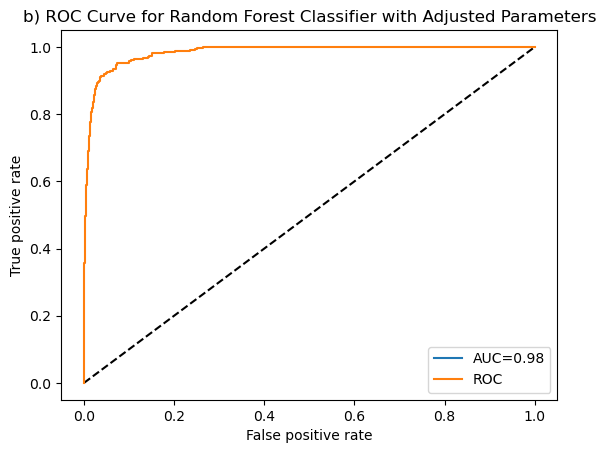

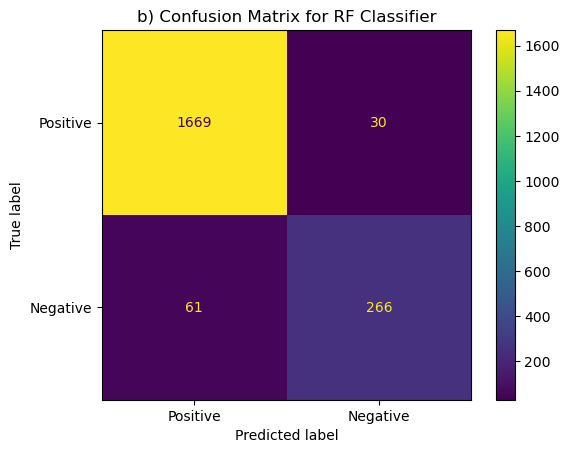

In [133]:
# Fitted to data and predicted using pipelined Random Forest changing the parameters
RF1_clf = make_pipeline(RandomForestClassifier(n_estimators = 250,
                                               max_depth = 6,
                                               max_features = 18,
                                               criterion = 'gini'))
RF1_clf.fit(X_train, y_train)
RF1_y_pred = RF1_clf.predict(X_test)

# Evaluation metrics
print('b) Evaluation metrics for RF run with adjusted parameters')
print('Prediction accuracy of random forest classifier: {:.3%}'.format
      (metrics.accuracy_score(y_test, RF1_y_pred)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, RF1_y_pred)))
print('Recall: {:.3%}'.format(metrics.recall_score(y_test, RF1_y_pred)))
print('F1 score: {:.0}'.format(metrics.f1_score(y_test, RF1_y_pred)))
print('AUC score: {:.2}'.format(auc_score_1))

# scores, ROC curve and AUC score computed
scores = RF1_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores, pos_label=1)
auc_score_RF1 = roc_auc_score(y_test, scores)

# Plotted the ROC curve graph and added AUC score to the plot
plt.plot(auc_score_RF1,label="AUC={:.2}".format(auc_score_RF1))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('b) ROC Curve for Random Forest Classifier with Adjusted Parameters')
plt.legend(loc='best')
plt.show()

# Created and displayed confusion matrix 
b_cm = confusion_matrix(y_test, RF1_y_pred)
display_labels = ['Positive', 'Negative']
disp = ConfusionMatrixDisplay(confusion_matrix=b_cm, display_labels=display_labels)
disp.plot()
plt.title('b) Confusion Matrix for RF Classifier')
plt.show()

# "Code Adapted from: [Ståle, H. and Egil Refsnes, J. (no date) 
# Python Machine Learning - Confusion Matrix. 
# Available at: https://www.w3schools.com/python/python_ml_confusion_matrix.asp

## Random Forest and PCA

### c) RF original with and without PCA

In [132]:
# Fit to data and predict using pipelined RF and PCA.
PCA_RF_clf = make_pipeline(PCA(n_components=4), 
                           RandomForestClassifier(n_estimators = 250, max_depth = 6, max_features = 18, criterion = 'gini')) 
PCA_RF_clf.fit(X_train, y_train)
PCA_RF_pred_test = PCA_RF_clf.predict(X_test)

print('Prediction accuracy of random forest classifier on the test dataset with PCA') 
print('{:.3%}\n'.format(metrics.accuracy_score(y_test, PCA_RF_pred_test)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, PCA_RF_pred_test)))
print('Recall: {:.3%}'.format(metrics.recall_score(y_test, PCA_RF_pred_test)))
print('F1 score: {:.3%}'.format(metrics.f1_score(y_test, PCA_RF_pred_test)))

Prediction accuracy of random forest classifier on the test dataset with PCA
84.995%

Precision score: 63.855%
Recall: 16.208%
F1 score: 25.854%


# SVC

### d) SVC original experiment

In [84]:
#SVC model run with rbf kernel and defualt gamma, degrees not relevant for rbf
svc_clf = SVC(kernel="rbf") 
clf = svc_clf.fit(X_train, y_train)
svc_y_pred = clf.predict(X_test)

print('d) Evaluation metrics for SVC with rbf kernel')
print('Prediction accuracy: {:.3%}'.format
      (metrics.accuracy_score(y_test, svc_y_pred)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, svc_y_pred)))
print('Recall: {:.3%}'.format(metrics.recall_score(y_test, svc_y_pred)))
print('F1 score: {:.3%}'.format(metrics.f1_score(y_test, svc_y_pred)))
#print('AUC score:', auc_score)

d_cm = confusion_matrix(y_test, svc_y_pred).ravel() 
print('Confusion matrix: \n',d_cm )


d) Evaluation metrics for SVC with rbf kernel
Prediction accuracy: 92.843%
Precision score: 86.992%
Recall: 65.443%
F1 score: 74.695%
Confusion matrix: 
 1667 32 113 214


### e) SVC experiment 1

In [85]:
# SVC run with poly kernel and suggested default 3 degrees
svc1_clf = SVC(kernel="poly", degree=3) 
clf1 = svc1_clf.fit(X_train, y_train)
svc1_y_pred = clf1.predict(X_test)

print('e) Evaluation metrics for SVC with poly kernel')
print('Prediction accuracy: {:.3%}'.format
      (metrics.accuracy_score(y_test, svc1_y_pred)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, svc1_y_pred)))
print('Recall: {:.3%}'.format(metrics.recall_score(y_test, svc1_y_pred)))
print('F1 score: {:.3%}'.format(metrics.f1_score(y_test, svc1_y_pred)))

e) Evaluation metrics for SVC with poly kernel
Prediction accuracy: 92.201%
Precision score: 87.556%
Recall: 60.245%
F1 score: 71.377%


### f) SVC with PCA

In [86]:
# SVM model with rbf kernel run with reduced features PCA
pca_svc_clf = make_pipeline(PCA(n_components=8), SVC(kernel="rbf"))
pca_svc_clf.fit(X_train, y_train)
pca_svc_y_pred = pca_svc_clf.predict(X_test)

print('f) Evaluation metrics for PCA with SVC rbf kernel')
print('Prediction accuracy of SVC classifier with PCA: {:.3%}'.format
      (metrics.accuracy_score(y_test, pca_svc_y_pred)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, pca_svc_y_pred)))
print('Recall: {:.3%}'.format(metrics.recall_score(y_test, pca_svc_y_pred)))
print('F1 score: {:.3%}'.format(metrics.f1_score(y_test, pca_svc_y_pred)))

f) Evaluation metrics for PCA with SVC rbf kernel
Prediction accuracy of SVC classifier with PCA: 88.796%
Precision score: 80.864%
Recall: 40.061%
F1 score: 53.579%


### All evaluation metrics for comparison

In [116]:
print(' ** Random Forest models **')

print('\n a) Evaluation metrics for RF with no parameter adjustments')
print('Prediction accuracy: {:.3%}'.format
      (metrics.accuracy_score(y_test, RF_y_pred)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test,RF_y_pred)))
print('Recall: {:.3%}'. format(metrics.recall_score(y_test,RF_y_pred)))
print('F1 score: {:.0}'.format(metrics.f1_score(y_test,RF_y_pred)))

# Evaluation metrics
print('\n b) Evaluation metrics for RF run with adjusted parameters')
print('Prediction accuracy: {:.3%}'.format
      (metrics.accuracy_score(y_test, RF1_y_pred)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, RF1_y_pred)))
print('Recall: {:.3%}'.format(metrics.recall_score(y_test, RF1_y_pred)))
print('F1 score: {:.0}'.format(metrics.f1_score(y_test, RF1_y_pred)))
print(b_cm)

print('\n c) Prediction accuracy of random forest classifier on the test dataset with PCA') 
print('{:.3%}'.format(metrics.accuracy_score(y_test, PCA_RF_pred_test)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, PCA_RF_pred_test)))
print('Recall: {:.3%}'.format(metrics.recall_score(y_test, PCA_RF_pred_test)))
print('F1 score: {:.0}'.format(metrics.f1_score(y_test, PCA_RF_pred_test)))

print('\n ** SVC Models **')

print('\n d) Evaluation metrics for SVC with rbf kernel')
print('Prediction accuracy: {:.3%}'.format
      (metrics.accuracy_score(y_test, svc_y_pred)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, svc_y_pred)))
print('Recall: {:.3%}'.format(metrics.recall_score(y_test, svc_y_pred)))
print('F1 score: {:.0}'.format(metrics.f1_score(y_test, svc_y_pred))) 
print('Confusion matrix: \n',d_cm )

print('\n e) Evaluation metrics for SVC with poly kernel')
print('Prediction accuracy: {:.3%}'.format
      (metrics.accuracy_score(y_test, svc1_y_pred)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, svc1_y_pred)))
print('Recall: {:.3%}'.format(metrics.recall_score(y_test, svc1_y_pred)))
print('F1 score: {:.0}'.format(metrics.f1_score(y_test, svc1_y_pred)))


print('\n f) Evaluation metrics for PCA with SVC rbf kernel')
print('Prediction accuracy of SVC classifier with PCA: {:.3%}'.format
      (metrics.accuracy_score(y_test, pca_svc_y_pred)))
print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, pca_svc_y_pred)))
print('Recall: {:.3%}'.format(metrics.recall_score(y_test, pca_svc_y_pred)))
print('F1 score: {:.0}'.format(metrics.f1_score(y_test, pca_svc_y_pred)))


 ** Random Forest models **

 a) Evaluation metrics for RF with no parameter adjustments
Prediction accuracy: 94.669%
Precision score: 92.941%
Recall: 72.477%
F1 score: 0.8
1678 32 113 214

 b) Evaluation metrics for RF run with adjusted parameters
Prediction accuracy: 95.755%
Precision score: 90.572%
Recall: 82.263%
F1 score: 0.9
1668 32 113 214

 c) Prediction accuracy of random forest classifier on the test dataset with PCA
85.044%
Precision score: 64.634%
Recall: 16.208%
F1 score: 0.3

 ** SVC Models **

 d) Evaluation metrics for SVC with rbf kernel
Prediction accuracy: 92.843%
Precision score: 86.992%
Recall: 65.443%
F1 score: 0.7
Confusion matrix: 
 1667 32 113 214

 e) Evaluation metrics for SVC with poly kernel
Prediction accuracy: 92.201%
Precision score: 87.556%
Recall: 60.245%
F1 score: 0.7

 f) Evaluation metrics for PCA with SVC rbf kernel
Prediction accuracy of SVC classifier with PCA: 88.796%
Precision score: 80.864%
Recall: 40.061%
F1 score: 0.5


### Decided to remove experiments g and h from the report as I was running out of space and h was only marginally better than b but wanted to keep them as I already coded all of it and removed average open to buy as it was perfectly positivey correlated with credit limit. Also still had the issue of the conufion matrix showing more TP's than there were churned customers in the whole data set.

### g) SVC experiment 2 with average open to buy removed

In [91]:
# created new X2 array with dropped Avg open to buy as it was perfectly correlated with credit limit 
#X2 = np.delete(X, 12, axis=1)
#X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [348]:
#column_names()

Index   Column Name
-----   -----------
    0   Customer_Age
    1   Gender
    2   Dependent_count
    3   Education_Level
    4   Income_Category
    5   Card_Category
    6   Months_on_book
    7   Total_Relationship_Count
    8   Months_Inactive_12_mon
    9   Contacts_Count_12_mon
   10   Credit_Limit
   11   Total_Revolving_Bal
   12   Avg_Open_To_Buy
   13   Total_Amt_Chng_Q4_Q1
   14   Total_Trans_Amt
   15   Total_Trans_Ct
   16   Total_Ct_Chng_Q4_Q1
   17   Avg_Utilization_Ratio
   18   Marital_Status_Divorced
   19   Marital_Status_Married
   20   Marital_Status_Single
   21   Marital_Status_Unknown


In [92]:
#SVC model run with rbf kernel and defualt gamma
#svc2_clf = SVC(kernel="rbf") 
#clf = svc2_clf.fit(X2_train, y_train)
#svc2_y_pred = clf.predict(X2_test)

#print('g) Evaluation metrics for SVC with rbf kernel with avg open to buy removed')
#print('Prediction accuracy of SVC classifier: {:.3%}'.format
      (metrics.accuracy_score(y_test, svc2_y_pred)))
#print('Precision score: {:.3%}'.format(metrics.precision_score(y_test, svc2_y_pred)))
#print('Recall: {:.3%}'.format(metrics.recall_score(y_test, svc2_y_pred)))
#print('F1 score: {:.3%}'.format(metrics.f1_score(y_test, svc2_y_pred)))

g) Evaluation metrics for SVC with rbf kernel with avg open to buy removed
Prediction accuracy of SVC classifier: 92.991%
Precision score: 87.149%
Recall: 66.361%
F1 score: 75.347%


### h) RF run with average open to buy removed 

h) Evaluation metrics for RF with avg open to buy removed
Prediction accuracy of random forest classifer: 95.459%
Precision score: 89.298%
Recall: 81.651%
F1 score: 0.9
AUC score:0.98


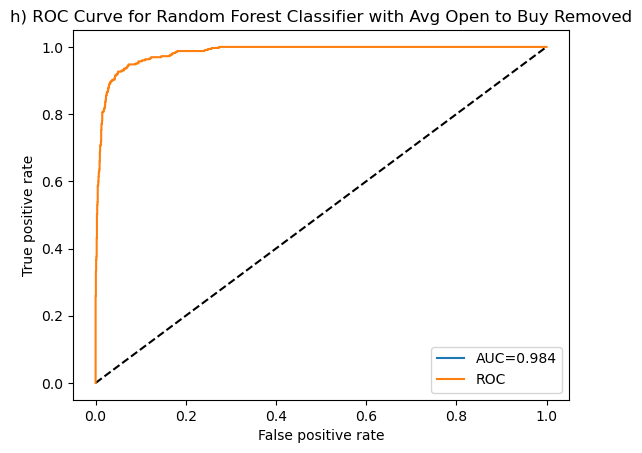

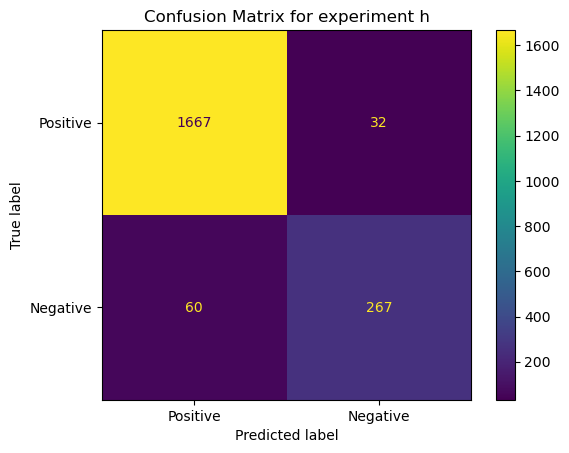

In [105]:
#RFX2_clf = make_pipeline(RandomForestClassifier(n_estimators = 250, max_depth = 6, max_features = 17)) 
#RFX2_clf.fit(X2_train, y_train)
#RFX2_y_pred = RFX2_clf.predict(X2_test)

# scores, ROC curve and AUC score computed
#scores = RFX2_clf.predict_proba(X2_test)[:,1]
#fpr, tpr, thresholds = roc_curve(y_test, scores, pos_label=1)
#auc_score_RFX2 = roc_auc_score(y_test, scores)

# Evaluation metrics
#print('h) Evaluation metrics for RF with avg open to buy removed')
#print('Prediction accuracy of random forest classifer: {:.3%}'.format
      (metrics.accuracy_score(y_test, RFX2_y_pred)))
#print('Precision score: {:.3%}'.format(metrics.precision_score(y_test,RFX2_y_pred)))
#print('Recall: {:.3%}'. format(metrics.recall_score(y_test,RFX2_y_pred)))
#print('F1 score: {:.0}'.format(metrics.f1_score(y_test,RFX2_y_pred)))
#print('AUC score:{:.2}'.format(auc_score_RFX2))

# Plotting the ROC curve graph
#plt.plot(auc_score_RFX2,label="AUC={:.3f}".format(auc_score_RFX2))
#plt.figure(1)
#plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr, tpr, label='ROC')
#plt.xlabel('False positive rate')
#plt.ylabel('True positive rate')
#plt.title('h) ROC Curve for Random Forest Classifier with Avg Open to Buy Removed')
#plt.legend(loc='best')
#plt.show()

# Created and diaplyed the confusion matrix
#cm = confusion_matrix(y_test, RFX2_y_pred)
#display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
#display_cm.plot()
#plt.title('Confusion Matrix for experiment h')
#plt.show()


#“Code adapted from: [https://www.w3schools.com/python/python_ml_confusion_matrix.asp, Unknown]”